<a href="https://colab.research.google.com/github/ucfilho/Raianars_July_2020/blob/master/DE_diversity_FakeRosenbrock_jul_10_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
from random import randint
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/ucfilho/Raianars_July_2020 #clonar do Github
%cd Raianars_July_2020

fatal: destination path 'Raianars_July_2020' already exists and is not an empty directory.
/content/Raianars_July_2020


In [3]:
import de_soma_Insight
import de_bounds_matriz
import Function
import Go2MinMax
from AvaliaX import AvaliaX


############################### DADOS DE ENTRADA 
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=100 #10 # PONTOS quantas vezes vai alteral NPAR 
NPAR=20 # NUMBER OF PARTICLES



mut=0.5
crossp=0.5
RUNS=5
Dimension=[5,10,15,20,30]



SOMA=0

In [4]:
def Diversity(X):
  soma=0
  nrow,ncol=X.shape
  for j in range(ncol):
    Xj=np.mean(X[:,j])
    for i in range(nrow):
        soma=soma+(X[i,j]-Xj)**2
  DI=(soma/nrow)**0.5
  return DI

In [5]:
start_time = time.time()
BEST_AGENTS=[]
MAT_Div=[]

for i in range(RUNS):

    #fchoice='Fake_Rosenbrock'  
    #Fun=Function.Fake_Rosenbrock
    fchoice='Rosenbrock'  
    Fun=Function.Rosenbrock
    

    dim=Dimension[i]
    
    TOTAL=10*dim*its*ITE

    

    MIN,MAX=Go2MinMax.Intervalo(dim,fchoice)

    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(dim)
    for ii in range(dim):
      diff[ii] = MAX[ii]-MIN[ii]
    X = MIN + pop * diff
    Div_initial=Diversity(X)
    #print('=====',X[1,1],'======')
    
    Div_dim=[]
    BEST_AGENTS=[]
    SOMA=0

    print('dimension=',dim)
    print('========',len(MAX),'========')

    for k in range(ITE):
      X,BEST,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR,its,Fun,X,SOMA,TOTAL)
      
      if((k+1)%1==0):
        #print(X[1,1])
        Div_time=Diversity(X)
        DI=Div_time/Div_initial
        Div_dim.append(DI)

    BEST_AGENTS.append(BEST_XY)    
    MAT_Div.append(Div_dim)
    start_run = (time.time()-start_time)/60
    print('run=',i,'total=50','Fobj=',FOBEST,'Time=',start_run)  
    

    ############################## Cálculo dos Parâmetros de Avaliação   
    TIME = (time.time() - start_time)/RUNS
    BEST_AGENTS=np.array(BEST_AGENTS)
    BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
    BEST=BEST_AGENTS_ST[0]
    WORSE=BEST_AGENTS_ST[-1]
    MEAN=np.mean(BEST_AGENTS,axis=0)
    MAXFO=BEST_AGENTS[:,-1].max()
    MINFO=BEST_AGENTS[:,-1].min()
    STD=BEST_AGENTS[:,-1].std()

    nome='_DE_STAT_Fo-'+str(mut)+'_CRo-'+str(crossp)+'_D-'+str(dim)+'_Interv-'+str(ITE)
    print('DE_POP_VAR_F_CR','TOTAL=',TOTAL,'Iterações=',ITE*its,'Dim=', dim,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
    print(nome, '\n')
    #print('BEST: ',BEST)
    #print('MÉDIA: ',MEAN)
    print('MÉDIA: ',MEAN[-1])
    print('MIN __:',MINFO)
    print('MAX__: ',MAXFO)
    print('STD __:',STD)
    print("Tempo Médio= %.3f segundos ---" % (TIME))
    print(RUNS,'Rodadas') 
    print()
    print('BEST: ',BEST)
    # print('melhor=',BEST_AGENTS[BEST_INDEX])

dimension= 5
======== 5 ========
run= 0 total=50 Fobj= 1.8815487717687334 Time= 0.003983910878499349
DE_POP_VAR_F_CR TOTAL= 5000 Iterações= 100 Dim= 5 Min/Max= -10 / 10 _ Rosenbrock
_DE_STAT_Fo-0.5_CRo-0.5_D-5_Interv-100 

MÉDIA:  1.8815487717687334
MIN __: 1.8815487717687334
MAX__:  1.8815487717687334
STD __: 0.0
Tempo Médio= 0.048 segundos ---
5 Rodadas

BEST:  [0.70329747 0.51366771 0.26069499 0.0454636  0.01275174 1.88154877]
dimension= 10
======== 10 ========
run= 1 total=50 Fobj= 39.23467435310383 Time= 0.0103819211324056
DE_POP_VAR_F_CR TOTAL= 10000 Iterações= 100 Dim= 10 Min/Max= -10 / 10 _ Rosenbrock
_DE_STAT_Fo-0.5_CRo-0.5_D-10_Interv-100 

MÉDIA:  39.23467435310383
MIN __: 39.23467435310383
MAX__:  39.23467435310383
STD __: 0.0
Tempo Médio= 0.125 segundos ---
5 Rodadas

BEST:  [ 8.03322394e-01  4.60226857e-01  4.13547180e-02  1.85792614e-02
  1.86790182e-01  3.74573169e-02 -1.89438186e-01  2.46531172e-01
  3.83381049e-01 -7.09310257e-02  3.92346744e+01]
dimension= 15
=======

In [6]:
X.shape

(20, 30)

In [7]:
print(pd.DataFrame(MAT_Div))

         0         1         2   ...        97        98        99
0  0.988879  0.921642  0.843044  ...  0.008042  0.007844  0.007820
1  0.981573  0.943168  0.907088  ...  0.056944  0.055703  0.056222
2  0.949664  0.903931  0.887866  ...  0.114554  0.114638  0.107440
3  0.997841  0.956805  0.935180  ...  0.167730  0.168936  0.162613
4  0.984263  0.961353  0.932078  ...  0.244941  0.244103  0.250167

[5 rows x 100 columns]


In [8]:
start_time = time.time()
BEST_AGENTS=[]
MAT_Div_Fake=[]

for i in range(RUNS):

    fchoice='Fake_Rosenbrock'  
    Fun=Function.Fake_Rosenbrock
    #fchoice='Rosenbrock'  
    #Fun=Function.Rosenbrock
    

    dim=Dimension[i]
    
    TOTAL=10*dim*its*ITE

    print('dimension=',dim)

    MIN,MAX=Go2MinMax.Intervalo(dim,fchoice)

    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(dim)
    for ii in range(dim):
      diff[ii] = MAX[ii]-MIN[ii]
    X = MIN + pop * diff
    Div_initial=Diversity(X)
    #print('=====',X[1,1],'======')
    
    Div_dim=[]
    BEST_AGENTS=[]
    SOMA=0

    for k in range(ITE):
      X,BEST,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR,its,Fun,X,SOMA,TOTAL)
      
      if((k+1)%1==0):
        #print(X[1,1])
        Div_time=Diversity(X)
        DI=Div_time/Div_initial
        Div_dim.append(DI)

    BEST_AGENTS.append(BEST_XY)    
    MAT_Div_Fake.append(Div_dim)
    start_run = (time.time()-start_time)/60
    print('run=',i,'total=50','Fobj=',FOBEST,'Time=',start_run)  
    

    ############################## Cálculo dos Parâmetros de Avaliação   
    TIME = (time.time() - start_time)/RUNS
    BEST_AGENTS=np.array(BEST_AGENTS)
    BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
    BEST=BEST_AGENTS_ST[0]
    WORSE=BEST_AGENTS_ST[-1]
    MEAN=np.mean(BEST_AGENTS,axis=0)
    MAXFO=BEST_AGENTS[:,-1].max()
    MINFO=BEST_AGENTS[:,-1].min()
    STD=BEST_AGENTS[:,-1].std()

    nome='_DE_STAT_Fo-'+str(mut)+'_CRo-'+str(crossp)+'_D-'+str(dim)+'_Interv-'+str(ITE)
    print('DE_POP_VAR_F_CR','TOTAL=',TOTAL,'Iterações=',ITE*its,'Dim=', dim,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
    print(nome, '\n')
    #print('BEST: ',BEST)
    #print('MÉDIA: ',MEAN)
    print('MÉDIA: ',MEAN[-1])
    print('MIN __:',MINFO)
    print('MAX__: ',MAXFO)
    print('STD __:',STD)
    print("Tempo Médio= %.3f segundos ---" % (TIME))
    print(RUNS,'Rodadas') 
    print()
    print('BEST: ',BEST)
    # print('melhor=',BEST_AGENTS[BEST_INDEX])

dimension= 5
run= 0 total=50 Fobj= 0.0007457691278525937 Time= 0.004147477944691976
DE_POP_VAR_F_CR TOTAL= 5000 Iterações= 100 Dim= 5 Min/Max= -10 / 10 _ Fake_Rosenbrock
_DE_STAT_Fo-0.5_CRo-0.5_D-5_Interv-100 

MÉDIA:  0.0007457691278525937
MIN __: 0.0007457691278525937
MAX__:  0.0007457691278525937
STD __: 0.0
Tempo Médio= 0.050 segundos ---
5 Rodadas

BEST:  [-1.87610834e+00  1.00000000e+01  9.80692698e-01  9.59826855e-01
 -8.17790226e+00  7.45769128e-04]
dimension= 10
run= 1 total=50 Fobj= 0.0046574552304841695 Time= 0.01036084493001302
DE_POP_VAR_F_CR TOTAL= 10000 Iterações= 100 Dim= 10 Min/Max= -10 / 10 _ Fake_Rosenbrock
_DE_STAT_Fo-0.5_CRo-0.5_D-10_Interv-100 

MÉDIA:  0.0046574552304841695
MIN __: 0.0046574552304841695
MAX__:  0.0046574552304841695
STD __: 0.0
Tempo Médio= 0.124 segundos ---
5 Rodadas

BEST:  [-1.57028540e+00 -2.21253802e+00 -1.00000000e+01  3.24379454e+00
 -1.00000000e+01 -1.00000000e+01  4.06837806e+00  1.02403327e+00
  1.04225675e+00 -1.37895435e+00  4.657455

In [9]:
print(pd.DataFrame(MAT_Div_Fake))

         0         1         2   ...        97        98        99
0  0.992658  0.995785  0.889524  ...  0.728845  0.728845  0.718729
1  0.998731  0.991145  0.995429  ...  0.811643  0.781139  0.781139
2  1.000615  0.974886  0.968280  ...  0.912691  0.919475  0.913030
3  0.991858  1.005712  1.019837  ...  0.981886  0.987125  0.991456
4  1.026564  1.017294  1.023547  ...  0.924745  0.928992  0.931144

[5 rows x 100 columns]


"\nplt.legend( ('SeiCo', 'Rosenbrock'), loc=[1,5], fontsize=10)\n"

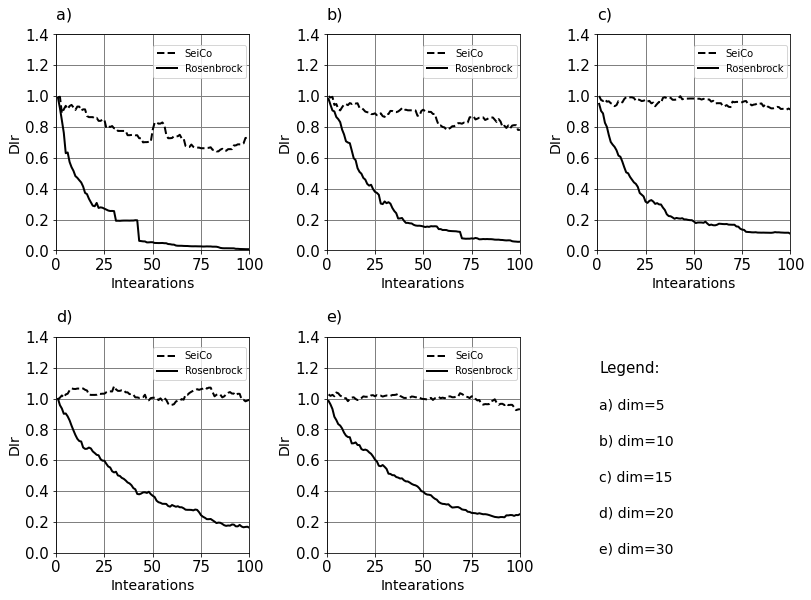

In [10]:
Legends=['a)', 'b)','c)','d)','e)','f)','g)','h)','i)','j)','k)','l)','m)', 'n)']
xite=range(1,101)
for i in range(RUNS):

  plt.subplot(2,3,i+1)
  plt.plot(xite,pd.DataFrame(MAT_Div_Fake).iloc[i],'k--',xite,pd.DataFrame(MAT_Div).iloc[i],'k-', linewidth=2)
  plt.xlim(0, 100)
  plt.ylim(0, 1.4)
  plt.text(-0.2,1.5,Legends[i],fontsize=16)
  #plt.legend( ('SeiCo', 'Rosenbrock'), loc=[90,0.8], fontsize=10)
  plt.legend( ('SeiCo', 'Rosenbrock'), loc=[0.5,0.8], fontsize=10)
  #plt.text(-0.2,1.2,Legends[i],fontsize=16)
  plt.xlabel('Intearations', fontsize=14)
  plt.ylabel('DIr', fontsize=14)
  plt.grid(True, linewidth=1,color='gray')
  plt.tick_params(axis='both', which='major', labelsize=15)

plt.subplots_adjust(bottom=0.2, right=2, left=0.3, top=2,hspace=0.4, wspace=0.4)

plt.subplot(2,3,RUNS+1)
plt.plot()
plt.ylim(0, 1.2)     # set the ylim to bottom, top
plt.xlim(0, 100)     # set the ylim to bottom, top
plt.axis('off')
plt.text(1,1,'Legend:',fontsize=15, color = 'k')
for i in range(RUNS):
  nome=Legends[i]+' dim='+str(Dimension[i])
  y=1.2-i*0.2-0.4
  plt.text(1,y,nome,fontsize=14, color = 'k')

'''
plt.legend( ('SeiCo', 'Rosenbrock'), loc=[1,5], fontsize=10)
'''